In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [7]:
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/newdata9/'

In [8]:
# Load data CST
data = pd.read_csv(dir + 'data_CST.csv')
model_params= pd.read_csv(dir + 'model_params_CST.csv')
#df_model = pd.read_csv(dir + 'df_model_CST.csv')

In [9]:
data.LeadID.nunique()

40

In [10]:
import re
model_params['coef'] = model_params['coef'].str.replace(re.escape('['), '')
model_params['coef'] = model_params['coef'].str.replace(re.escape(']'), '')

model_params['intercept'] = model_params['intercept'].str.replace(re.escape('['), '')
model_params['intercept'] = model_params['intercept'].str.replace(re.escape(']'), '')

model_params['scale'] = model_params['scale'].str.replace(re.escape('['), '')
model_params['scale'] = model_params['scale'].str.replace(re.escape(']'), '')

model_params['mean'] = model_params['mean'].str.replace(re.escape('['), '')
model_params['mean'] = model_params['mean'].str.replace(re.escape(']'), '')

model_params['coef'] = pd.to_numeric(model_params['coef'], downcast="float")
model_params['intercept'] = pd.to_numeric(model_params['intercept'], downcast="float")
model_params['scale'] = pd.to_numeric(model_params['scale'], downcast="float")
model_params['mean'] = pd.to_numeric(model_params['mean'], downcast="float")

/tmp/ipykernel_256261/4024776742.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  model_params['coef'] = model_params['coef'].str.replace(re.escape('['), '')
/tmp/ipykernel_256261/4024776742.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  model_params['coef'] = model_params['coef'].str.replace(re.escape(']'), '')
/tmp/ipykernel_256261/4024776742.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  model_params['intercept'] = model_params['intercept'].str.replace(re.escape('['), '')
/tmp/ipykernel_256261/4024776742.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  model_params['intercept'] = model_params['intercept'].str.replace(re.escape(']'), '')
/tmp/ipykernel_256261/4024776742.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  m

In [11]:
model_params['coef_org'] = np.true_divide(model_params.coef, model_params.scale)
model_params['intercept_org'] = model_params['intercept'] - (model_params['coef_org'] * model_params['mean'])

In [12]:
model_params.coef_org.mean()

1.9513719

In [13]:
model_params.intercept_org.mean()

-1.9849806

In [14]:
import math
math.exp(model_params.coef_org.mean())

7.038336912116079

In [15]:
# CI test accuracy
from scipy import stats
import numpy as np
import math
from math import sqrt

def mean_CI (d):
    mean, sigma = np.mean(d), np.std(d)
    ci = stats.norm.interval(0.95, loc=mean, scale=sigma/sqrt(len(d)))
    print('mean: ', mean)
    print('CI: ', ci)

In [16]:
mean_CI(model_params.coef_org)

mean:  1.9513719
CI:  (1.8773557453706708, 2.025388071005062)


In [17]:
mean_CI(model_params.intercept_org)

mean:  -1.9849806
CI:  (-2.04412340482175, -1.925837761560086)


In [18]:
mean_CI(math.exp(model_params.coef_org.mean()))

TypeError: object of type 'float' has no len()

## Standardized data HDP

/tmp/ipykernel_4997/3170726259.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 150])


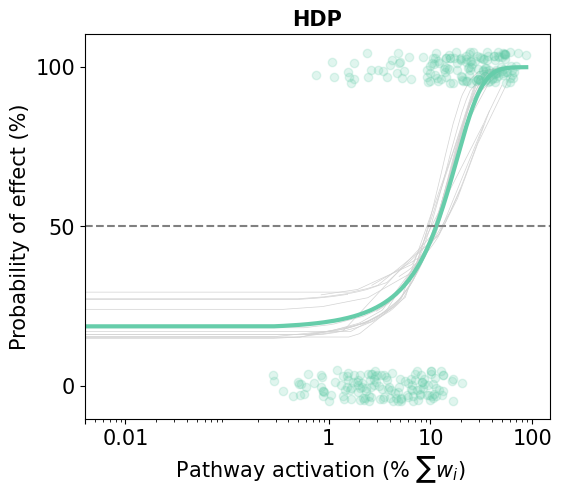

In [18]:
# One curve per lead
#LeadID = data.LeadID.unique()

plt.style.use('default')

# One curve per subject
data['SubjectID'] = pd.DataFrame(data.LeadID.str.split('_').str[0])
LeadID = data.SubjectID.unique()

plt.figure(1, figsize=(6, 5))
#plt.clf()

# Scatter points
y = data.outcome
jittered_y = y + 0.1 * np.random.rand(len(y)) - 0.05
plt.scatter(data.percent_w, jittered_y, color="mediumaquamarine", zorder=20, alpha=0.2)

# Individual curves
for i in LeadID:
    #X_test = data.loc[data.LeadID == i].percent_w.sort_values() # for individual leads
    X_test = data.loc[data.SubjectID == i].percent_w.sort_values() # for individual subjects
    coef = model_params.loc[model_params.LeadID == i].coef_org
    intercept = model_params.loc[model_params.LeadID == i].intercept_org
    loss = expit(X_test * float(coef) + float(intercept)).ravel()
    plt.xscale('log')
    plt.plot(X_test, loss, color="lightgrey", linewidth=0.5)

# Average
X_test = data.percent_w.sort_values()
coef = model_params.coef_org.mean()
intercept = model_params.intercept_org.mean()

loss = expit(X_test * coef + intercept).ravel()
plt.plot(X_test, loss, color="mediumaquamarine", linewidth=3, )

plt.xscale('log')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.title('HDP', {'weight':'heavy'}, fontsize=15)
plt.xlabel ( r' Pathway activation (% $\sum w_i$)' , fontsize=15)
xs=[0.004, 0.01, 1, 10, 100]
xlabels=['','0.01', '1', '10', '100']
plt.xticks(xs, xlabels, fontsize=15)
plt.xlim([0, 150])

plt.ylabel('Probability of effect (%)', fontsize=15)
ys=[0,0.5, 1]
ylabels=['0','50', '100']

plt.yticks(ys, ylabels, fontsize=15)



plt.savefig('/mnt/data/2020_Projects/2021_HDP/03_Data/Plots/logreg_pathways_HDP_manfit.png', dpi=300, bbox_inches='tight')

plt.show()

## Standardized data CST

/tmp/ipykernel_256261/3348296129.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 150])


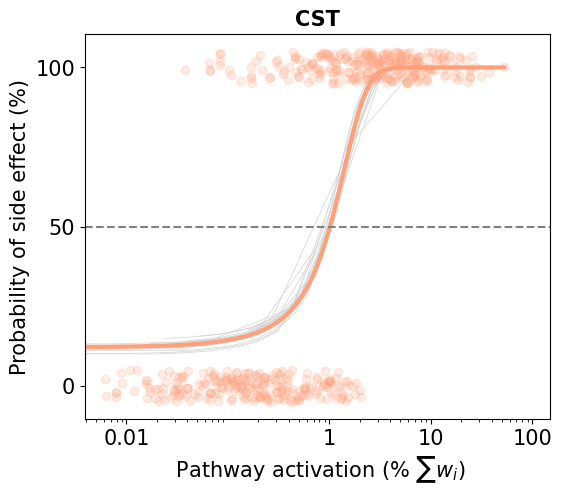

In [20]:
# one curve per lead
LeadID = data.LeadID.unique()

plt.style.use('default')

# One curve per subject
data['SubjectID'] = pd.DataFrame(data.LeadID.str.split('_').str[0])
LeadID = data.SubjectID.unique()

plt.figure(1, figsize=(6, 5))
plt.clf()

# Scatter points
y = data.outcome
jittered_y = y + 0.1 * np.random.rand(len(y)) - 0.05
plt.scatter(data.percent_w, jittered_y, color="lightsalmon", zorder=20, alpha=0.2)

# Individual curves
for i in LeadID:
    #X_test = data.loc[data.LeadID == i].percent_w.sort_values() # curves per lead
    X_test = data.loc[data.SubjectID == i].percent_w.sort_values() # curves per subject
    coef = model_params.loc[model_params.LeadID == i].coef_org
    intercept = model_params.loc[model_params.LeadID == i].intercept_org
    loss = expit(X_test * float(coef) + float(intercept)).ravel()
    plt.xscale('log')
    plt.plot(X_test, loss, color="lightgrey", linewidth=0.5)

# Average
X_test = data.percent_w.sort_values()
coef = model_params.coef_org.mean()
intercept = model_params.intercept_org.mean()

loss = expit(X_test * coef + intercept).ravel()
plt.plot(X_test, loss, color="lightsalmon", linewidth=3, )

plt.xscale('log')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.title('CST', {'weight':'heavy'}, fontsize=15)
plt.xlabel ( r' Pathway activation (% $\sum w_i$)' , fontsize=15)

xs=[0.01, 1, 10, 100]
plt.xticks(xs, xs, fontsize=15)

plt.xlim([0, 150])
plt.ylabel('Probability of side effect (%)', fontsize=15)
ys=[0,0.5, 1]
labels=['0','50', '100']
#labels=['No effect','50%', 'Effect']
plt.yticks(ys, labels, fontsize=15)

plt.savefig('/mnt/data/2020_Projects/2021_HDP/03_Data/Plots/logreg_pathways_CST_manfit.png', dpi=300, bbox_inches='tight')

plt.show()

In [12]:
data.loc[(data['outcome']==1) & (data['percent_w']<4)]
data.loc[(data['outcome']==1)].percent_w.mean()

5.178158518455367